## **TRAFFIC ACCIDENT ANALYSIS AND RISK ASSESSMENT PROJECT**

### **Import Libraries**

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, classification_report, precision_score
from sklearn.ensemble import RandomForestClassifier

### **Import Data**

In [2]:
traffic_data = pd.read_csv("C:/Users/niibo/Downloads/Python-Data-Analysis-Projects-Package/Python Data Analysis Projects Package/Project 9/traffic_accident_data.csv")

In [3]:
traffic_data.head()

,Accident_ID,Location,Time_of_Day,Weather_Conditions,Vehicle_Type,Accident_Severity,Traffic_Density,Accident_Time,Accident_Hour,Injuries,Fatalities
0,ACC_1,Area_2,Afternoon,Snowy,Motorcycle,Severe,High,2025-02-17 11:52:19.049925,21,5,0
1,ACC_2,Area_1,Evening,Foggy,Car,Severe,Medium,2024-08-24 11:52:19.049935,19,3,0
2,ACC_3,Area_5,Night,Clear,Truck,Moderate,Low,2024-09-21 11:52:19.049938,3,2,0
3,ACC_4,Area_4,Night,Rainy,Motorcycle,Severe,Low,2024-08-05 11:52:19.049940,18,2,0
4,ACC_5,Area_4,Evening,Rainy,Motorcycle,Severe,Low,2024-07-21 11:52:19.049942,1,2,0


### **Metadata of Data**

In [5]:
print("No of columns: ", traffic_data.shape[0])
print("No of rows: ", traffic_data.shape[1])

No of columns:  100
No of rows:  11


In [6]:
# look for missing values
missing_values = traffic_data.isnull().sum()
print("Missing Values: ")
missing_values

Missing Values: 


Accident_ID           0
Location              0
Time_of_Day           0
Weather_Conditions    0
Vehicle_Type          0
Accident_Severity     0
Traffic_Density       0
Accident_Time         0
Accident_Hour         0
Injuries              0
Fatalities            0
dtype: int64

## **GEOSPATIAL ANALYSIS**

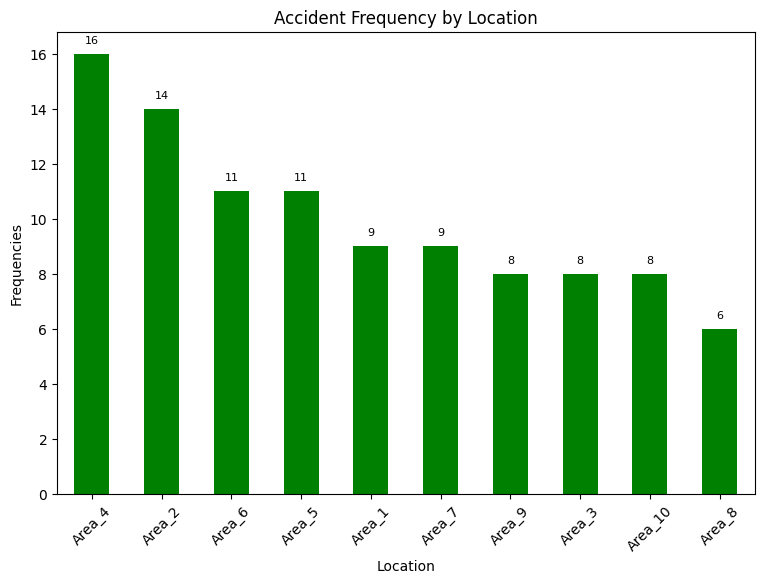

In [9]:
# Perform a spatial analysis to identify accident hotspots, 
# which will involve plotting accident locations and determining areas with higher accident frequencies.

location_counts = traffic_data['Location'].value_counts()

plt.figure(figsize = (9, 6))
location_counts.plot(kind = 'bar', color = 'green')
plt.title('Accident Frequency by Location')
plt.xlabel('Location')
plt.ylabel('Frequencies')
plt.xticks(rotation = 45)
for i, v in enumerate(location_counts):
    plt.text(i, v + 0.02*max(location_counts), str(v), ha='center', va='bottom', fontsize=8)
plt.show()

## **TEMPORAL ANALYSIS**

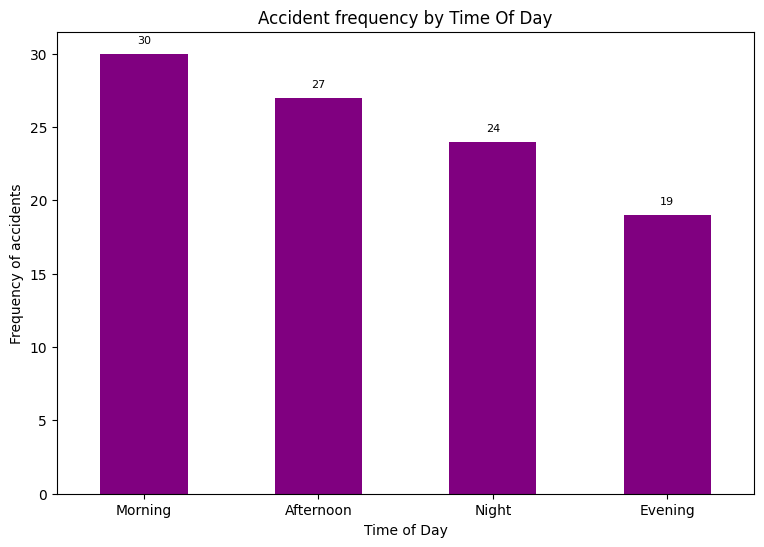

In [12]:
# Analyze the time-of-day patterns to identify when accidents are most likely to occur. 
time_of_day_counts = traffic_data['Time_of_Day'].value_counts()

plt.figure(figsize = (9, 6))
time_of_day_counts.plot(kind = 'bar', color = 'purple')
plt.title('Accident frequency by Time Of Day')
plt.xlabel('Time of Day')
plt.ylabel('Frequency of accidents')
plt.xticks(rotation = 0)
for i, v in enumerate(time_of_day_counts):
    plt.text(i, v + 0.02*max(time_of_day_counts), str(v), ha = 'center', va = 'bottom', fontsize = 8)
plt.show()

## **Weather and Accident Severity Correlation**

<Figure size 1500x600 with 0 Axes>

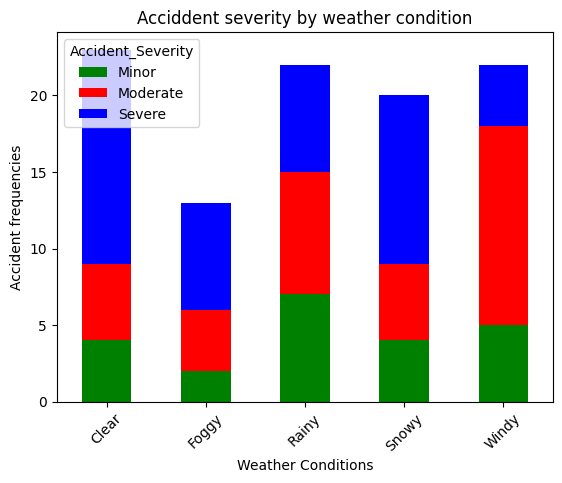

In [23]:
plt.figure(figsize = (15, 6))
weather_severity = pd.crosstab(traffic_data['Weather_Conditions'], traffic_data['Accident_Severity'])
weather_severity.plot(kind = 'bar', stacked = True, color = ['green','red','blue'])
plt.title('Acciddent severity by weather condition')
plt.xlabel('Weather Conditions')
plt.ylabel('Accident frequencies')
plt.xticks(rotation = 45)
plt.show()

## **Vehicle Type Analysis**

<Figure size 1000x600 with 0 Axes>

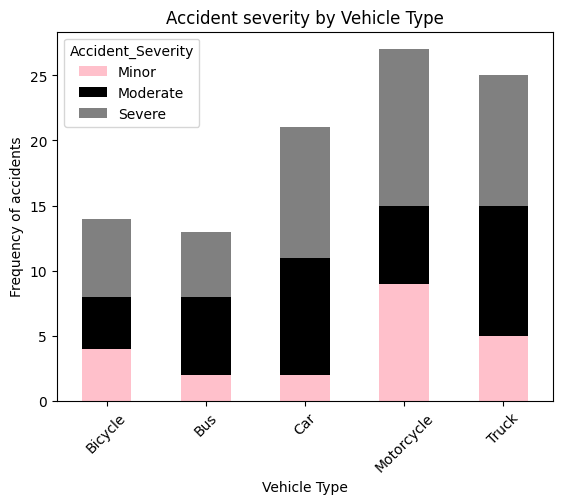

In [26]:
plt.figure(figsize = (10, 6))
vehicle_severity = pd.crosstab(traffic_data['Vehicle_Type'], traffic_data['Accident_Severity'])
vehicle_severity.plot(kind = 'bar', stacked = True, color = ['pink', 'black', 'grey'])
plt.title('Accident severity by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Frequency of accidents')
plt.xticks(rotation = 45)
plt.show()

## **Traffic Density Analysis**

<Figure size 1000x600 with 0 Axes>

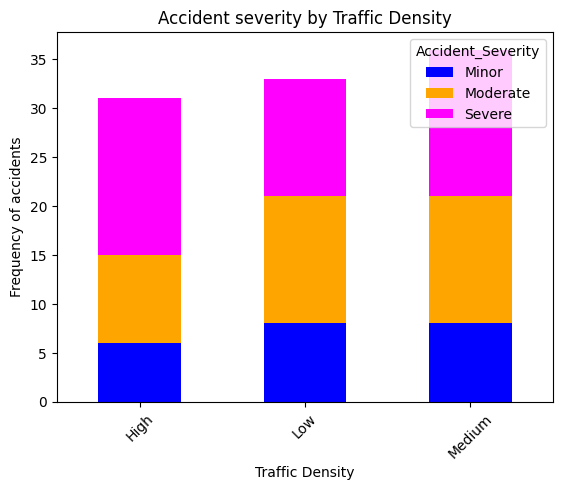

In [28]:
plt.figure(figsize = (10, 6))
traffic_severity = pd.crosstab(traffic_data['Traffic_Density'], traffic_data['Accident_Severity'])
traffic_severity.plot(kind = 'bar', stacked = True, color = ['blue', 'orange', 'magenta'])
plt.title('Accident severity by Traffic Density')
plt.xlabel('Traffic Density')
plt.ylabel('Frequency of accidents')
plt.xticks(rotation = 45)
plt.show()

## **Injury and Fatality Analysis**

<Figure size 1000x600 with 0 Axes>

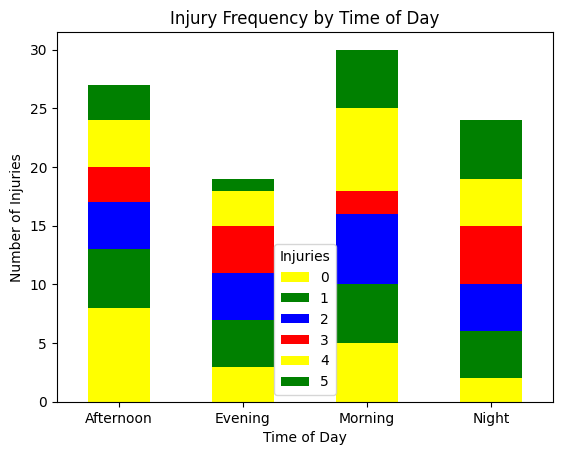

<Figure size 1000x600 with 0 Axes>

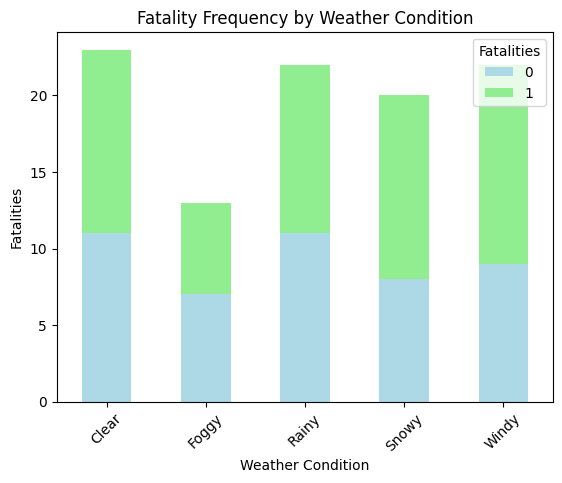

In [29]:
plt.figure(figsize=(10, 6))
injury_fatality_conditions = pd.crosstab(traffic_data['Time_of_Day'], traffic_data['Injuries'])
injury_fatality_conditions.plot(kind='bar', stacked=True, color=['yellow', 'green', 'blue', 'red'])
plt.title("Injury Frequency by Time of Day")
plt.xlabel('Time of Day')
plt.ylabel('Number of Injuries')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 6))
fatality_conditions = pd.crosstab(traffic_data['Weather_Conditions'], traffic_data['Fatalities'])
fatality_conditions.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title("Fatality Frequency by Weather Condition")
plt.xlabel('Weather Condition')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.show()

## **Accident Risk Prediction Model**

In [3]:
# Label encode the categorical columns in numerical columns
label = LabelEncoder()
traffic_data['Time_of_Day'] = label.fit_transform(traffic_data['Time_of_Day'])
traffic_data['Weather_Conditions'] = label.fit_transform(traffic_data['Weather_Conditions'])
traffic_data['Vehicle_Type'] = label.fit_transform(traffic_data['Vehicle_Type'])
traffic_data['Accident_Severity'] = label.fit_transform(traffic_data['Accident_Severity'])
traffic_data['Traffic_Density'] = label.fit_transform(traffic_data['Traffic_Density'])

traffic_data.head()

,Accident_ID,Location,Time_of_Day,Weather_Conditions,Vehicle_Type,Accident_Severity,Traffic_Density,Accident_Time,Accident_Hour,Injuries,Fatalities
0,ACC_1,Area_2,0,3,3,2,0,2025-02-17 11:52:19.049925,21,5,0
1,ACC_2,Area_1,1,1,2,2,2,2024-08-24 11:52:19.049935,19,3,0
2,ACC_3,Area_5,3,0,4,1,1,2024-09-21 11:52:19.049938,3,2,0
3,ACC_4,Area_4,3,2,3,2,1,2024-08-05 11:52:19.049940,18,2,0
4,ACC_5,Area_4,1,2,3,2,1,2024-07-21 11:52:19.049942,1,2,0


In [18]:
# Select the features and the target feature
x = traffic_data[['Time_of_Day', 'Weather_Conditions', 'Vehicle_Type', 'Traffic_Density', 'Accident_Hour']]
y = traffic_data['Accident_Severity']

In [20]:
# Train and test data
x_train, x_test, y_test, y_train = train_test_split(x, y, test_size = 0.5, random_state = 42) 

In [21]:
# Random Forest Classifier Model

print(len(x_train))
print(len(y_train))

50
50


In [22]:
rfc_model = RandomForestClassifier(n_estimators = 100, random_state  = 42)
rfc_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
# Predict the model
y_rfc_pred = rfc_model.predict(x_test) 

# Evaluate the model performance
print("Accuracy Score:", accuracy_score(y_test, y_rfc_pred))
print("Classification Report:\n", classification_report(y_test, y_rfc_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_rfc_pred))

Accuracy Score: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.10      0.12        10
           1       0.30      0.40      0.34        15
           2       0.54      0.52      0.53        25

    accuracy                           0.40        50
   macro avg       0.34      0.34      0.33        50
weighted avg       0.39      0.40      0.39        50

Confusion Matrix:
 [[ 1  4  5]
 [ 3  6  6]
 [ 2 10 13]]


## **Validation and Performance Evaluation**

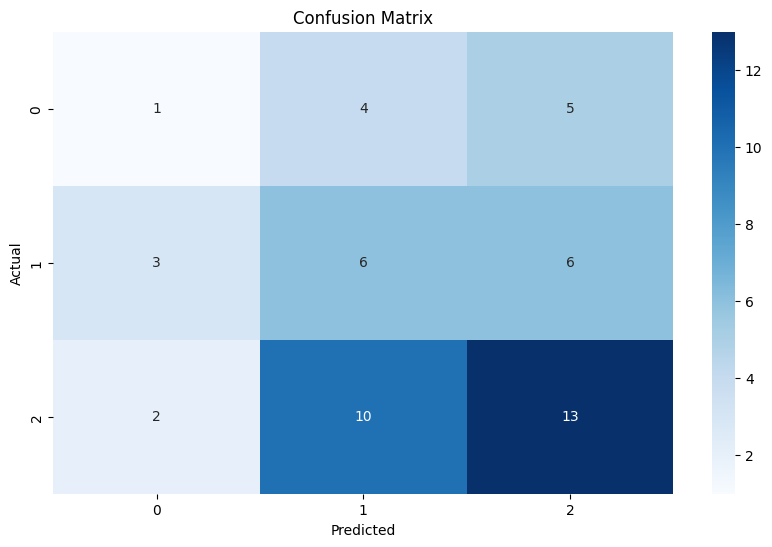

In [31]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test,y_rfc_pred)
plt.figure(figsize = (10, 6))
sns.heatmap(conf_matrix, annot = True, fmt ='d', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()